In [53]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let’s focus on 3 coins as follows: c<sub>1</sub> is that first coin flipped; c<sub>rand</sub> is a coin you choose at random; c<sub>min</sub> is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let ν<sub>1</sub>, ν<sub>rand</sub> and ν<sub>min</sub> be the fraction of heads you obtain for the respective three coins.

### (a) What is mu for the three coins selected?
Assuming a fair coin, P(heads) = P(tails) = 0.5. Then, for c<sub>1</sub>, c<sub>rand</sub>, c<sub>min</sub>, mu = 0.5 regardless of the outcomes of the flips.

In [45]:
def experiment(number_of_coins, number_of_flips):
    heads = np.zeros(number_of_coins)
    for _ in range(number_of_flips):
        p = np.random.uniform(size=number_of_coins)
        heads[p > 0.5] += 1
    
    random_coin =  np.random.choice(number_of_coins)
    minimum_coin = np.argmin(heads)
    heads /= number_of_flips

    v1 = heads[0]
    vrand = heads[random_coin]
    vmin = heads[minimum_coin]

    return v1, vrand, vmin

### (b) Repeat the entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν<sub>1</sub>, ν<sub>rand</sub>, and ν<sub>min</sub> and plot the histograms of the distributions of ν<sub>1</sub>, ν<sub>rand</sub>, and ν<sub>min</sub>. Notice that which coins end up being c<sub>rand</sub>, and c<sub>min</sub> may differ from one run to another.

In [82]:
number_of_coins = 1000
number_of_flips = 10
number_of_runs = 100000

def print_fractions(v1, vrand, vmin):
    print("v1= ", v1)
    print("vrand= ", vrand)
    print("vmin= ", vmin)

v1, vrand, vmin = experiment(number_of_coins, number_of_flips)
print_fractions(v1, vrand, vmin)

v1s, vrands, vmins = [], [], []
# v1s, vrands, vmins = np.array([]), np.array([]), np.array([])
for _ in range(number_of_runs):
    v1, vrand, vmin = experiment(number_of_coins, number_of_flips)
    # np.append(v1s, v1)
    # np.append(vrands, vrand)
    # np.append(vmins, vmin)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)


v1=  0.4
vrand=  0.2
vmin=  0.0


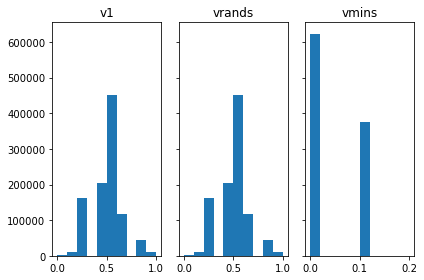

In [83]:
def plot_fractions_hist(v1s, vrands, vmins):
    n_bins = 10
    _, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
    
    axs[0].hist(v1s,bins=n_bins)
    axs[0].set_title("v1")

    axs[1].hist(vrands,bins=n_bins)
    axs[1].set_title("vrands")

    axs[2].hist(vmins,bins=n_bins)
    axs[2].set_title("vmins")

plot_fractions_hist(v1s, vrands, vmins)

### (c) Using (b), plot estimates of ℙ[|𝜈 − 𝜇| > 𝜖] as a function of ϵ, together with the Hoeffding bound 2𝑒 −2𝜖 2𝑁 (on the same graph).

In [84]:
def hoeffding(eps, N):
    return 2 * np.exp(-2 * (eps**2) * N)

In [85]:
mu = 0.5
eps = np.linspace(0, 5, 100) / number_of_flips
v1s_diff, vrands_diff, vmins_diff = np.abs(np.array(v1s) - mu), np.abs(np.array(vrands) - mu), np.abs(np.array(vmins) - mu)
p1, prand, pmin = [], [], []

for i in range(eps.shape[0]):
    eps_i = eps[i]
    p1.append(np.sum(v1s_diff > eps_i) / number_of_runs)
    prand.append(np.sum(vrands_diff > eps_i) / number_of_runs)
    pmin.append(np.sum(vmins_diff > eps_i) / number_of_runs)

hoeffding_bounds = hoeffding(eps, number_of_flips)

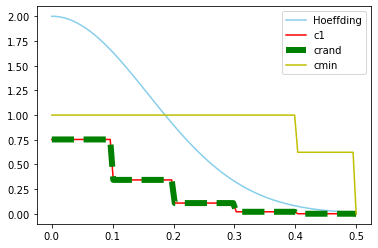

In [102]:
plt.plot(eps, hoeffding_bounds, color='skyblue', label='Hoeffding')
plt.plot(eps, p1, color='r', label='c1')
plt.plot(eps, prand, color='g', label='crand', linewidth=6, linestyle= "--")
plt.plot(eps, pmin, color='y', label='cmin')
plt.legend()

### (d) Which coins obey the Hoeffding bound, which ones do not? Explain why.
The c1  and  crand coins obey the Hoeffding inequality, but cmin does not. That's because cmin was chosen during the experiments runs based on the sample results which violates the Hoeffding's conditions stating that the hypothesis has been chosen before experiments runs.

### Relate part (d) to the multiple bins in Figure 1.
